# Magic Stats
A letter denotes that the player won with the deck in the row over the deck of the column. 

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set sns style 
sns.set_style('darkgrid')

data = pd.read_csv('data.csv', index_col=0)

data.fillna('', inplace= True)
data = data.replace('x', '')

data

,Atraxa,Vampire,Scrap,Mutate,Portal,Kalamax,Arcane
Atraxa,,mee,me,e,,,
Vampire,em,,,eeemm,,em,
Scrap,m,,,eee,,e,
Mutate,e,,,,,e,m
Portal,e,,,,,,
Kalamax,m,,e,e,e,,
Arcane,,,,ee,,,


# Player stats

In [200]:
# Following needs to be inputed before running the rest of the notebook 
players = ['m', 'e']
names = ['Max', 'Emilie', 'Total'] 

# Extract relevant data
columns = data.columns
len_names = len(names)

# Create numeric dataframes for each player and the total
player_dfs = [data.applymap(lambda x: x.count(name)) for name in players]
player_dfs.append(data.applymap(lambda x: len(x)))

df = pd.DataFrame(index=columns)

for i in range(len_names):
    df[f'{names[i]} wins'] = player_dfs[i].sum(axis = 1)
    if(i == len_names-1):
        df[f'{names[i]} losses'] = player_dfs[-1].sum(axis = 0)
    else:
        df[f'{names[i]} losses'] = player_dfs[-1].sum(axis = 0) - player_dfs[i].sum(axis=0) 
    df[f'{names[i]} total'] = df[f'{names[i]} wins'] + df[f'{names[i]} losses']
    df[f'{names[i]} plus_minus'] = df[f'{names[i]} wins'] - df[f'{names[i]} losses']
    df[f'{names[i]} plus_minus norm'] = df[f'{names[i]} plus_minus'] / df[f'{names[i]} total']

df

,Max wins,Max losses,Max total,Max plus_minus,Max plus_minus norm,Emilie wins,Emilie losses,Emilie total,Emilie plus_minus,Emilie plus_minus norm,Total wins,Total losses,Total total,Total plus_minus,Total plus_minus norm
Atraxa,2,3,5,-1,-0.200000,4,3,7,1,0.142857,6,6,12,0,0.000000
Vampire,4,2,6,2,0.333333,5,1,6,4,0.666667,9,3,12,6,0.500000
Scrap,1,2,3,-1,-0.333333,4,1,5,3,0.600000,5,3,8,2,0.250000
Mutate,1,10,11,-9,-0.818182,2,2,4,0,0.000000,3,12,15,-9,-0.600000
Portal,0,1,1,-1,-1.000000,1,0,1,1,1.000000,1,1,2,0,0.000000
Kalamax,1,3,4,-2,-0.500000,3,1,4,2,0.500000,4,4,8,0,0.000000
Arcane,0,0,0,0,NaN,2,1,3,1,0.333333,2,1,3,1,0.333333


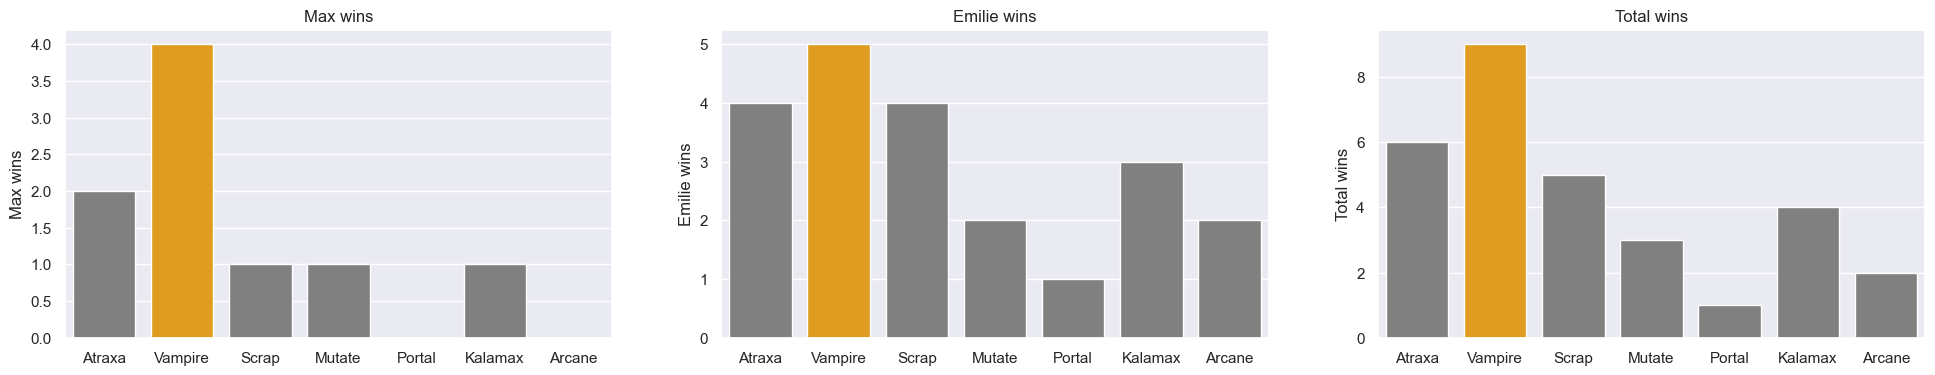

In [201]:
# Bar plots giving overview of won games
fig, axes = plt.subplots(1, len_names, figsize=(8*len_names, 4))

for i in range(len_names):
    key = f'{names[i]} wins'
    cols = ['grey' if (x < max(df[key])) else 'orange' for x in df[key]]
    sns.barplot(y = df[key], x = columns, ax = axes[i], palette=cols)
    axes[i].set_title(key)

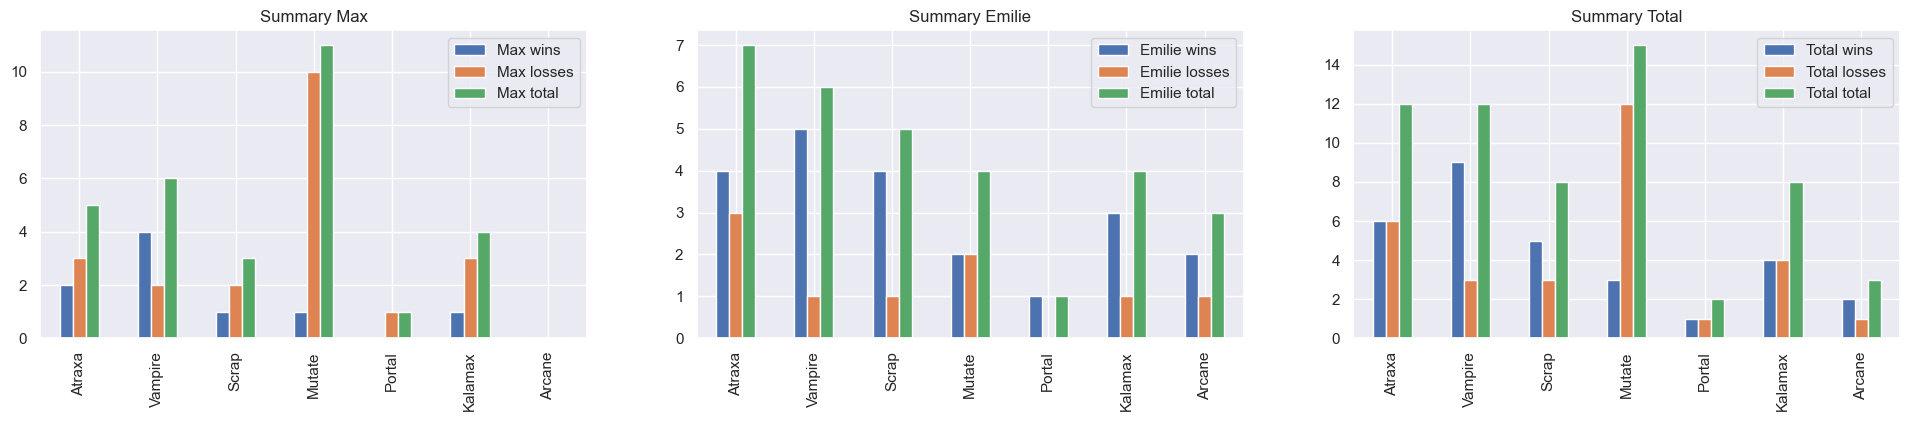

In [202]:
# Bar plots giving overview of played games
fig, axes = plt.subplots(1, len_names, figsize=(8*len_names, 4))

for i in range(len_names):
    df[[f'{names[i]} wins',f'{names[i]} losses', f'{names[i]} total']].plot(kind='bar', stacked=False, ax=axes[i])
    axes[i].set_title(f'Summary {names[i]}')


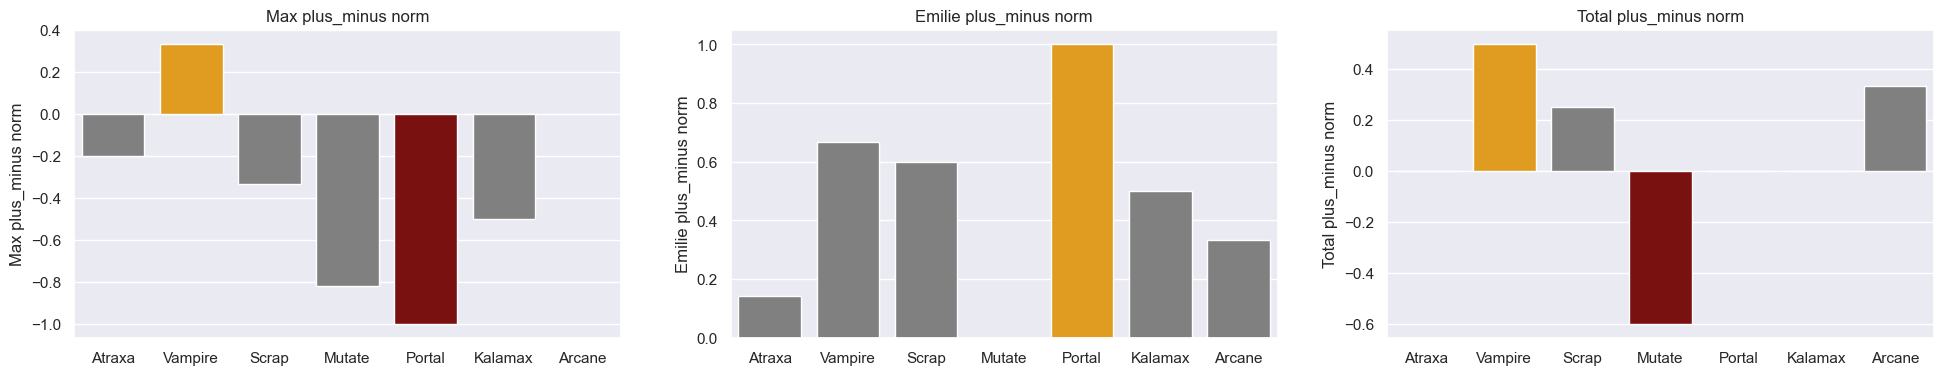

In [203]:
# Bar charts depicting "Plus_minus" scores normalized by nummber of played games
# -1 indicates that all games have been lost 
# 1 indicates that all games have been won
# 0 indicates that deck has same number of wins/losses

fig, axes = plt.subplots(1, len_names, figsize=(8*len_names, 4))

for i in range(len_names):
    key = f'{names[i]} plus_minus norm'
    cols = ['orange' if (x == max(df[key])) else ('darkred' if (x == min(df[key])) else 'gray') for x in df[key]]
    sns.barplot(y = df[key], x = columns, ax=axes[i], palette = cols)
    axes[i].set_title(key)

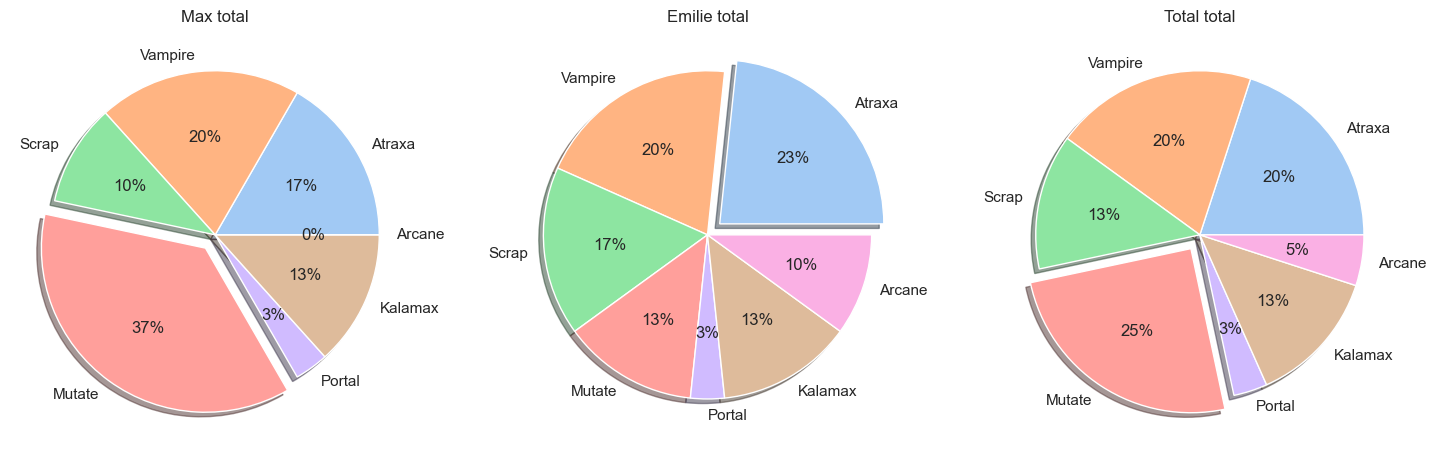

In [204]:
# Pie charts depicting portion of games that have been played wiith each deck
fig, axes = plt.subplots(1, len_names, figsize=(6*len_names, 6))

palette_color = sns.color_palette('pastel')

for i in range(len_names):
    key = f'{names[i]} total'
    explode = [0 if (x < max(df[key])) else 0.1 for x in df[key]]

    axes[i].pie(df[key], labels=columns, colors=palette_color, explode=explode, autopct='%.0f%%', shadow = True)
    axes[i].set_title(key)
    



# Deck stats

In [232]:
# Dataframe for deck stats (information gets lost in the player dataframe)
deck_df = pd.DataFrame(index = columns)

for deck in columns:
    deck_df[f'{deck} wins'] = player_dfs[-1].loc[deck].values
    deck_df[f'{deck} losses'] = player_dfs[-1][deck].values
    deck_df[f'{deck} total'] = deck_df[f'{deck} wins'] + deck_df[f'{deck} losses']

deck_df

,Atraxa wins,Atraxa losses,Atraxa total,Vampire wins,Vampire losses,Vampire total,Scrap wins,Scrap losses,Scrap total,Mutate wins,...,Mutate total,Portal wins,Portal losses,Portal total,Kalamax wins,Kalamax losses,Kalamax total,Arcane wins,Arcane losses,Arcane total
Atraxa,0,0,0,2,3,5,1,2,3,1,...,2,1,0,1,1,0,1,0,0,0
Vampire,3,2,5,0,0,0,0,0,0,0,...,5,0,0,0,0,2,2,0,0,0
Scrap,2,1,3,0,0,0,0,0,0,0,...,3,0,0,0,1,1,2,0,0,0
Mutate,1,1,2,5,0,5,3,0,3,0,...,0,0,0,0,1,1,2,2,1,3
Portal,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
Kalamax,0,1,1,2,0,2,1,1,2,1,...,2,0,1,1,0,0,0,0,0,0
Arcane,0,0,0,0,0,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,0


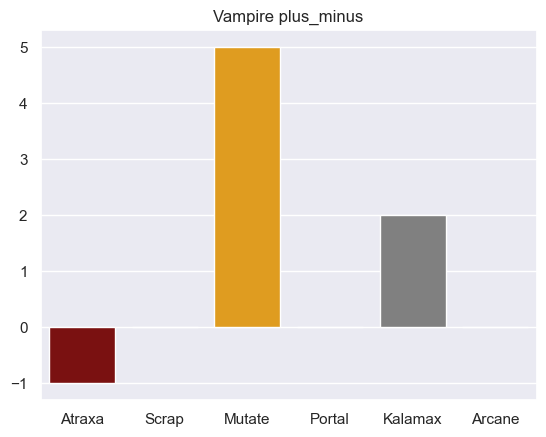

In [233]:
# Choose the deck you want to plot infromation for
deck = 'Vampire'

plus_minus_deck = (deck_df[f'{deck} wins'] - deck_df[f'{deck} losses']).drop(deck)

cols = ['orange' if (x == max(plus_minus_deck)) else ('darkred' if (x == min(plus_minus_deck)) else 'gray') for x in plus_minus_deck]
sns.barplot(y = plus_minus_deck, x = columns.drop(deck), palette = cols)

ax = plt.gca()
ax.set_title(f"{deck} plus_minus")
plt.show()

# Recommended matches

In [249]:
# Least played deck of respective player
print('----------------------------')
print(f"Least played by players: \t {df[f'{names[0]} total'].idxmin()} vs {df[f'{names[1]} total'].idxmin()}")
print('----------------------------')

# Least played matchup of least played deck
lp_deck = df[f'{names[-1]} total'].idxmin() #Least played deck
deck = deck_df[f'{lp_deck} total'].drop(lp_deck).idxmin()    
print(f"Least played decks, matchup: \t {lp_deck} vs {deck}")
print('----------------------------')

# Least played matchups (Can produce several matchups)
least_played = [min(deck_df[f'{deck} total'].drop(deck)) for deck in columns]
min_indices = [i for i, n in enumerate(least_played) if n == min(least_played)]

print(f"Least played matchups: \t \t Played {least_played[min_indices[0]]} times")

matchups = []
for i in min_indices:
    deck = columns[i]
    matchup = sorted([deck, deck_df[f'{deck} total'].drop(deck).idxmin()])
    if matchup not in matchups:
        matchups.append(matchup)
        print(f'{matchup[0]} vs {matchup[1]}')
print('----------------------------')





----------------------------
Least played by players: 	 Arcane vs Portal
----------------------------
Least played decks, matchup: 	 Portal vs Vampire
----------------------------
Least played matchups: 	 	 Played 0 times
Arcane vs Atraxa
Scrap vs Vampire
Mutate vs Portal
Portal vs Vampire
Arcane vs Kalamax
----------------------------
